In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/google_stock/GOOGL.csv', index_col= 'Date', parse_dates=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [6]:
len(df)

4041

In [7]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4041 entries, 2004-08-19 to 2020-09-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4041 non-null   float64
 1   High       4041 non-null   float64
 2   Low        4041 non-null   float64
 3   Close      4041 non-null   float64
 4   Adj Close  4041 non-null   float64
 5   Volume     4041 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 221.0 KB


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,1643.569946,1644.500000,1625.329956,1629.530029,1629.530029,1321100
2020-09-01,1632.160034,1659.219971,1629.530029,1655.079956,1655.079956,1133800
2020-09-02,1668.010010,1726.099976,1660.189941,1717.390015,1717.390015,2476100
2020-09-03,1699.520020,1700.000000,1607.709961,1629.510010,1629.510010,3180200
2020-09-04,1609.000000,1634.989990,1537.970093,1581.209961,1581.209961,2792533


In [10]:
df['last_close'] = df['Close'].shift(1)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close
Date,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,NaN
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488


In [12]:
 df['return'] = (df['Close'] - df['last_close']) / df['last_close']

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,return
Date,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,NaN,NaN
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,50.220219,0.079430
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,54.209209,0.010064
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,54.754753,-0.041408
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,52.487488,0.010775


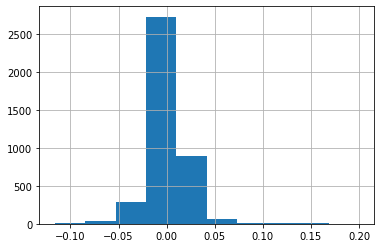

In [14]:
df['return'].hist()

In [15]:
df.drop([ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'last_close'], axis=1,inplace=True)

In [16]:
df.head()

,return
Date,
2004-08-19,NaN
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775


In [17]:
df = df[1:]

In [18]:
df.head()

,return
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019


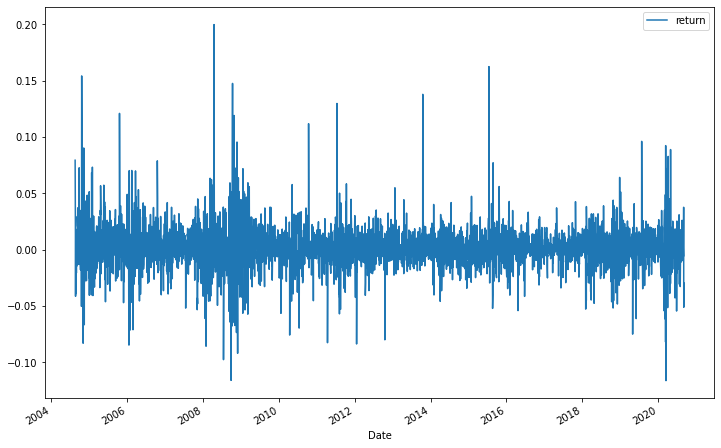

In [19]:
df.plot(figsize = (12,8))

In [20]:
len(df)

4040

## **train test split**

In [21]:
test_size = 172

In [22]:
test_ind = len(df)- test_size

In [23]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [24]:
train.head()

,return
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019


In [25]:
test.head()

,return
Date,
2020-01-02,0.021868
2020-01-03,-0.005231
2020-01-06,0.026654
2020-01-07,-0.001932
2020-01-08,0.007118


In [26]:
len(train)

3868

In [27]:
len(test)

172

## **scaling data**

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaled_train = scaler.fit_transform(train)


In [31]:
scaled_train

array([[0.61872492],
       [0.39921608],
       [0.23633566],
       ...,
       [0.34918373],
       [0.33249252],
       [0.36661394]])

In [32]:
scaled_train.shape


(3868, 1)

In [33]:
scaled_test = scaler.transform(test)

In [34]:
scaled_test

array([[ 0.43657133],
       [ 0.35081515],
       [ 0.45171616],
       [ 0.36125701],
       [ 0.38989374],
       [ 0.40059024],
       [ 0.38780799],
       [ 0.39188479],
       [ 0.34662499],
       [ 0.38641511],
       [ 0.39146853],
       [ 0.43143802],
       [ 0.37320873],
       [ 0.37082824],
       [ 0.36911829],
       [ 0.32789611],
       [ 0.29303641],
       [ 0.40885622],
       [ 0.38089583],
       [ 0.36204748],
       [ 0.32065042],
       [ 0.47740379],
       [ 0.28799077],
       [ 0.36877089],
       [ 0.43284546],
       [ 0.37410189],
       [ 0.43059067],
       [ 0.3703063 ],
       [ 0.3853289 ],
       [ 0.3564507 ],
       [ 0.37853551],
       [ 0.36884898],
       [ 0.37867868],
       [ 0.35101668],
       [ 0.29742498],
       [ 0.2316994 ],
       [ 0.29261788],
       [ 0.37684275],
       [ 0.1954981 ],
       [ 0.42584889],
       [ 0.47859038],
       [ 0.25643274],
       [ 0.47117152],
       [ 0.21427592],
       [ 0.32159049],
       [ 0

In [35]:
scaled_test.shape

(172, 1)

## **Time series Generator**

In [36]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
length = 10

In [38]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

In [39]:
len(generator)

3858

In [40]:
len(scaled_train)

3868

## **Model**

In [41]:
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Dense, LSTM

In [43]:
n_features =1

In [44]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [46]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size=1)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor = "val_loss", patience= 2)

In [49]:
model.fit_generator(generator, epochs = 30, validation_data=validation_generator,
                    callbacks = [early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
3858/3858 [==============================] - 64s 16ms/step - loss: 0.0042 - val_loss: 0.0086
Epoch 2/30
3858/3858 [==============================] - 62s 16ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 3/30
3858/3858 [==============================] - 61s 16ms/step - loss: 0.0037 - val_loss: 0.0078
Epoch 4/30
3858/3858 [==============================] - 60s 16ms/step - loss: 0.0037 - val_loss: 0.0078


In [50]:
losses = pd.DataFrame(model.history.history)

In [51]:
losses

,loss,val_loss
0,0.004227,0.008632
1,0.003829,0.007708
2,0.003740,0.007789
3,0.003685,0.007809


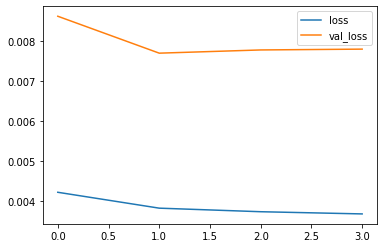

In [52]:
losses.plot()

## **Single-Step Prediction**

In [53]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[scaled_test[i]]], axis = 1)

In [54]:
test_predictions

[array([0.3538086], dtype=float32),
 array([0.3557732], dtype=float32),
 array([0.35549977], dtype=float32),
 array([0.35674977], dtype=float32),
 array([0.3564862], dtype=float32),
 array([0.35599452], dtype=float32),
 array([0.35638463], dtype=float32),
 array([0.35633916], dtype=float32),
 array([0.35629618], dtype=float32),
 array([0.35530132], dtype=float32),
 array([0.35522377], dtype=float32),
 array([0.35570425], dtype=float32),
 array([0.35686487], dtype=float32),
 array([0.35655624], dtype=float32),
 array([0.35575214], dtype=float32),
 array([0.35533014], dtype=float32),
 array([0.35412443], dtype=float32),
 array([0.35227296], dtype=float32),
 array([0.35362905], dtype=float32),
 array([0.35482436], dtype=float32),
 array([0.3546322], dtype=float32),
 array([0.35347703], dtype=float32),
 array([0.35602397], dtype=float32),
 array([0.3547173], dtype=float32),
 array([0.35374603], dtype=float32),
 array([0.35576135], dtype=float32),
 array([0.3559752], dtype=float32),
 array(

In [55]:
len(test_predictions)

172

In [56]:
predictions = scaler.inverse_transform(test_predictions)

In [57]:
predictions

array([[-0.00428539],
       [-0.00366456],
       [-0.00375097],
       [-0.00335596],
       [-0.00343925],
       [-0.00359463],
       [-0.00347135],
       [-0.00348572],
       [-0.0034993 ],
       [-0.00381368],
       [-0.00383819],
       [-0.00368636],
       [-0.00331959],
       [-0.00341712],
       [-0.00367122],
       [-0.00380458],
       [-0.00418559],
       [-0.00477067],
       [-0.00434213],
       [-0.0039644 ],
       [-0.00402513],
       [-0.00439017],
       [-0.00358532],
       [-0.00399823],
       [-0.00430517],
       [-0.00366831],
       [-0.00360073],
       [-0.00334552],
       [-0.00344309],
       [-0.00359122],
       [-0.00380956],
       [-0.0038597 ],
       [-0.00389074],
       [-0.00386657],
       [-0.00402635],
       [-0.00458677],
       [-0.00554005],
       [-0.0058237 ],
       [-0.00512725],
       [-0.00589615],
       [-0.00514942],
       [-0.00364737],
       [-0.00432356],
       [-0.00385195],
       [-0.00467031],
       [-0

In [58]:
test

,return
Date,
2020-01-02,0.021868
2020-01-03,-0.005231
2020-01-06,0.026654
2020-01-07,-0.001932
2020-01-08,0.007118
...,...
2020-08-31,-0.006039
2020-09-01,0.015679
2020-09-02,0.037648


In [59]:
true_predictions = pd.DataFrame(data=predictions, index= test.index,columns=['predictions'])

In [60]:
true_predictions

,predictions
Date,
2020-01-02,-0.004285
2020-01-03,-0.003665
2020-01-06,-0.003751
2020-01-07,-0.003356
2020-01-08,-0.003439
...,...
2020-08-31,-0.003692
2020-09-01,-0.003898
2020-09-02,-0.003668


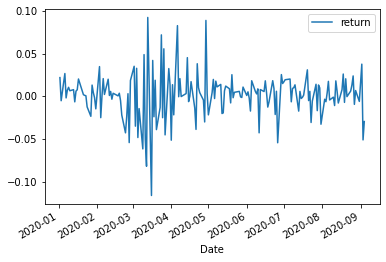

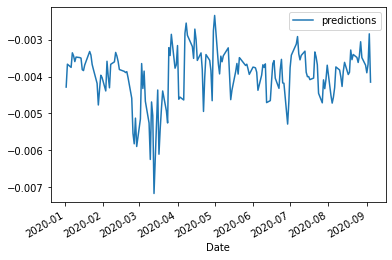

In [61]:
test.plot()
true_predictions.plot()

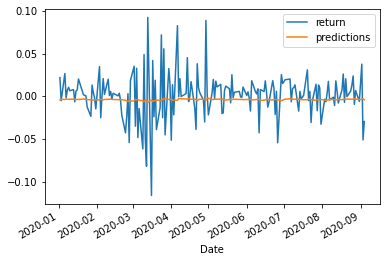

In [62]:
ax = test.plot()
true_predictions.plot(ax=ax)

## **Multi-Step Prediction**

In [63]:
test_predictions_2 = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions_2.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis = 1)

In [64]:
test_predictions_2

[array([0.3538086], dtype=float32),
 array([0.35386944], dtype=float32),
 array([0.35374212], dtype=float32),
 array([0.35368824], dtype=float32),
 array([0.35365596], dtype=float32),
 array([0.3536311], dtype=float32),
 array([0.35361993], dtype=float32),
 array([0.35360238], dtype=float32),
 array([0.35360226], dtype=float32),
 array([0.3536057], dtype=float32),
 array([0.35360125], dtype=float32),
 array([0.35360086], dtype=float32),
 array([0.35360056], dtype=float32),
 array([0.35360044], dtype=float32),
 array([0.35360032], dtype=float32),
 array([0.3536003], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 array([0.35360026], dtype=float32),
 arra

In [65]:
len(test_predictions_2)

172

In [66]:
predictions_2 = scaler.inverse_transform(test_predictions_2)

In [67]:
predictions_2

array([[-0.00428539],
       [-0.00426617],
       [-0.0043064 ],
       [-0.00432343],
       [-0.00433363],
       [-0.00434148],
       [-0.00434501],
       [-0.00435056],
       [-0.0043506 ],
       [-0.00434951],
       [-0.00435092],
       [-0.00435104],
       [-0.00435113],
       [-0.00435117],
       [-0.00435121],
       [-0.00435122],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0.00435123],
       [-0

In [68]:
test

,return
Date,
2020-01-02,0.021868
2020-01-03,-0.005231
2020-01-06,0.026654
2020-01-07,-0.001932
2020-01-08,0.007118
...,...
2020-08-31,-0.006039
2020-09-01,0.015679
2020-09-02,0.037648


In [69]:
true_predictions_2 = pd.DataFrame(data=predictions_2, index= test.index,columns=['predictions_2'])

In [70]:
true_predictions_2

,predictions_2
Date,
2020-01-02,-0.004285
2020-01-03,-0.004266
2020-01-06,-0.004306
2020-01-07,-0.004323
2020-01-08,-0.004334
...,...
2020-08-31,-0.004351
2020-09-01,-0.004351
2020-09-02,-0.004351


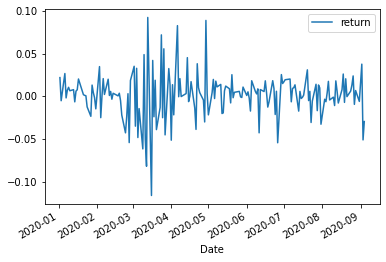

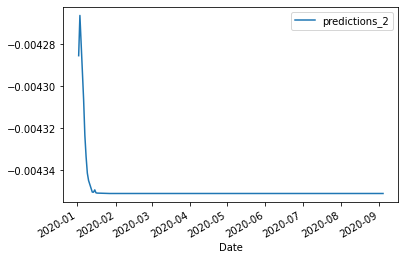

In [71]:
test.plot()
true_predictions_2.plot()

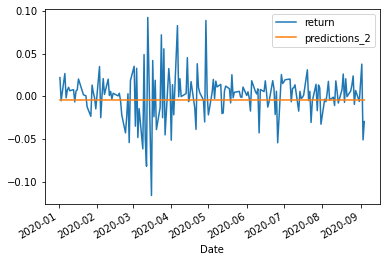

In [72]:
ax = test.plot()
true_predictions_2.plot(ax=ax)

**So, Even the prediction of return is not feasible with the LSTM model. The graphs show the same trend as in the first notebook. Also, the result for the single-step prediction is even worse in this case.Now, We can also try to classify the return value in +ve or -ve return that'll also be of huge value.**